In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
 

In [2]:
#getting the data
df = pd.read_csv('Tweet.csv', encoding='ISO-8859-1')

In [3]:
#Viewing our data frame
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Lets Rename our columns to 

In [4]:
#Renaming columns
df.columns = ['Tweet', 'Product/Brand', 'Emotion']
df.head()

,Tweet,Product/Brand,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
#Viewing shape of our data
df.shape

(9093, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          9092 non-null   object
 1   Product/Brand  3291 non-null   object
 2   Emotion        9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [7]:
df['Emotion'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [8]:
df['Product/Brand'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

the column : 'Product/Brand' seems to have about 6,0000 missing values. The 'Tweet' column also seems to have 1 missing value. for now lets just drop the missing tweet. Also lets inspect the Tweets that are missing values in the Producct/Brand column.  To handle the missing data in the 'emotion_in_tweet_is_directed_at' columm we will be using the KNNImputer

In [9]:
#Dropping Missing Tweet
df.dropna(subset=['Tweet'], inplace=True)

In [10]:
# Inspecting Missing Products
df[df['Product/Brand'].isna()].head(20)

,Tweet,Product/Brand,Emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product
34,Anyone at #SXSW who bought the new iPad want ...,NaN,No emotion toward brand or product
35,At #sxsw. Oooh. RT @mention Google to Launch ...,NaN,No emotion toward brand or product
37,SPIN Play - a new concept in music discovery f...,NaN,No emotion toward brand or product
39,VatorNews - Google And Apple Force Print Media...,NaN,No emotion toward brand or product
41,HootSuite - HootSuite Mobile for #SXSW ~ Updat...,NaN,No emotion toward brand or product
42,Hey #SXSW - How long do you think it takes us ...,NaN,No emotion toward brand or product


In [11]:
#converting to String
df['Tweet'] = df['Tweet'].apply(lambda x: str(x))
df['Product/Brand'] = df['Product/Brand'].astype(str)


In [12]:
# Brand name mapping
brand = {'iPhone': 'apple',
         'iPad or iPhone App':'apple',
         'iPad': 'apple',
         'Google': 'google',
         'nan': 'UNK',
         'Android':'google',
         'Apple': 'apple',
         'Android App':'google',
         'Other Google product or service':'google',
         'Other Apple product or service':'apple'
        }
df['Brand'] = df['Product/Brand'].map(brand)

In [13]:
# Encoding class label to brief
label_encoder = {'Negative emotion': 'negative',
                 'Positive emotion': 'positive',
                 'No emotion toward brand or product': 'neutral',
                 "I can't tell":'confused'}

df['Emotion'] = df['Emotion'].map(label_encoder)
# drop the rows containing 'confused' labels
df = df[df['Emotion'] != 'confused']
   

In [14]:
df.shape

(8936, 4)

In [15]:
#Dropping Product/Brand Column
df.drop(columns='Product/Brand',inplace=True)

In [16]:
df.head()

,Tweet,Emotion,Brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,negative,apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,positive,apple
2,@swonderlin Can not wait for #iPad 2 also. The...,positive,apple
3,@sxsw I hope this year's festival isn't as cra...,negative,apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,positive,google


In [17]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8936 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    8936 non-null   object
 1   Emotion  8936 non-null   object
 2   Brand    8936 non-null   object
dtypes: object(3)
memory usage: 279.2+ KB


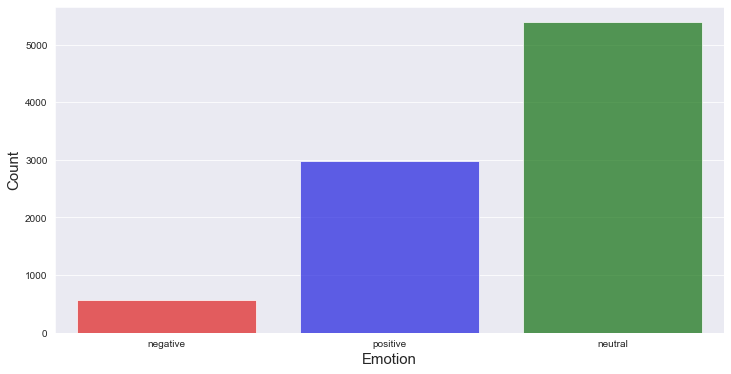

In [18]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='Emotion', data=df,  
              palette={'positive':'b', 'negative':'r', 'neutral':'g'}, alpha=0.7)
plt.xlabel('Emotion', fontsize=15)
plt.ylabel('Count', fontsize=15);

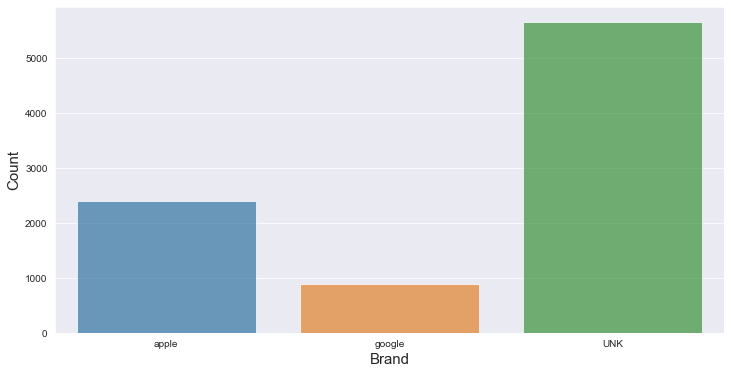

In [19]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='Brand', data=df, alpha=0.7)
plt.xlabel('Brand', fontsize=15)
plt.ylabel('Count', fontsize=15);

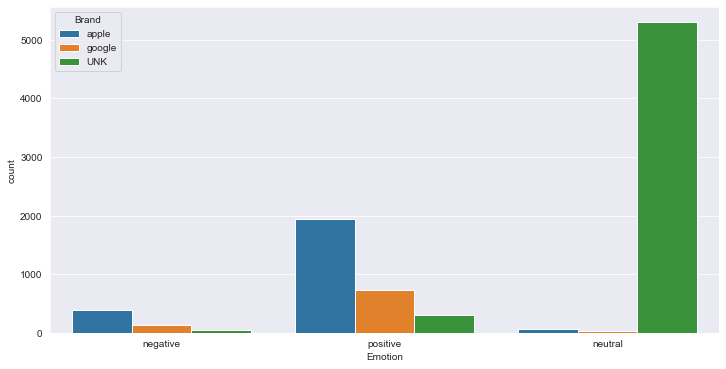

In [20]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x = 'Emotion', hue='Brand')

This function below takes in a pandas dataframe (df) and a dictionary mapping brand names to categories (brand). For each row in the dataframe, the function checks if the 'Brand' column is labeled as 'UNK' (unknown). If it is, the function extracts the text from the 'Tweet' column and checks if it contains any of the brand names in the dictionary. If a match is found, the function updates the 'Brand' column with the mapped category value and moves on to the next row. If no match is found or if both brands are found, the 'Brand' column remains labeled as 'UNK'. Finally, the function returns the updated dataframe.

In [21]:
def reduce_unknown_brands(df, brand):
    # Iterate through each row in the dataframe
    for i in df.index:
        # Check if the 'Brand' column is labeled 'UNK'
        if df.at[i, 'Brand'] == 'UNK':
            # Extract the text from the 'Tweet' column
            text = df.at[i, 'Tweet']
            # Initialize variables for both Apple and Google
            apple_present = False
            google_present = False
            # Iterate through the brand dictionary
            for key, val in brand.items():
                # Check if the brand name (key) is present in the text (case-insensitive)
                if key.lower() == "apple" and key.lower() in text.lower():
                    apple_present = True
                elif key.lower() == "google" and key.lower() in text.lower():
                    google_present = True
            # Update the 'Brand' column with the appropriate value based on which brand is present in the tweet text
            if apple_present and not google_present:
                df.at[i, 'Brand'] = brand['Apple']
            elif google_present and not apple_present:
                df.at[i, 'Brand'] = brand['Google']
            else:
                df.at[i, 'Brand'] = 'UNK'
    # Return the updated dataframe
    return df



In [22]:
new_df = reduce_unknown_brands(df, brand)


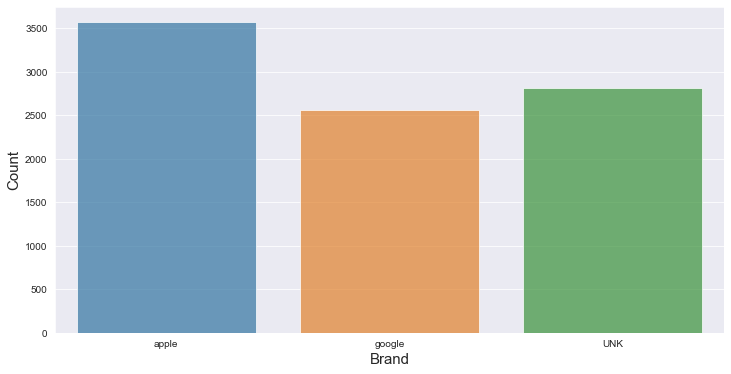

In [23]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='Brand', data=new_df, alpha=0.7)
plt.xlabel('Brand', fontsize=15)
plt.ylabel('Count', fontsize=15);

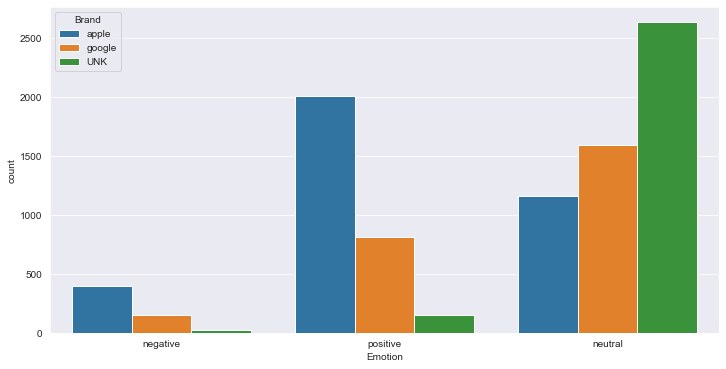

In [24]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=new_df, x = 'Emotion', hue='Brand')

We can see the difference that our function made and now most of our tweets belong to the apple brand as opposed to being Unknown. 

Text Preprocessinng: 

In [25]:
from nltk.tokenize import RegexpTokenizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from nltk import FreqDist
from matplotlib.ticker import MaxNLocator
import contractions


The contractions library is used to expand contractions in text data. A contraction is a shortened version of a word or group of words, where an apostrophe represents missing letters. For example, "I'm" is a contraction of "I am", "you're" is a contraction of "you are", and so on.

When working with text data, it's often useful to expand contractions because it can help to improve the accuracy of natural language processing (NLP) models, and it can also make text easier to read and understand. For example, if you're analyzing sentiment in social media data, it's important to expand contractions because "I'm happy" and "I am happy" have the same meaning, but a model may interpret them differently if contractions are not expanded.

In [26]:
# Apply contractions.fix() to each element in the 'Tweet' column
new_df['Tweet'] = new_df['Tweet'].apply(contractions.fix)

# View the updated DataFrame
print(new_df)

                                                  Tweet   Emotion   Brand
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...  negative   apple
1     @jessedee Know about @fludapp ? Awesome iPad/i...  positive   apple
2     @swonderlin Can not wait for #iPad 2 also. The...  positive   apple
3     @sxsw I hope this year's festival is not as cr...  negative   apple
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...  positive  google
...                                                 ...       ...     ...
9088                      Ipad everywhere. #SXSW {link}  positive   apple
9089  Wave, buzz... RT @mention We interrupt your re...   neutral  google
9090  Google's Zeiger, a physician never reported po...   neutral  google
9091  Some Verizon iPhone customers complained their...   neutral     UNK
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   neutral  google

[8936 rows x 3 columns]


the contractions library did a great job for the most part but we seill have to clean our text so lets create a function that does just that.

In [27]:
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
import seaborn as sns
import pandas as pd
nltk.download('stopwords')
nltk.download('wordnet')
lem = WordNetLemmatizer()

def clean_and_normalize(tweet, stop_words):
    '''
    Takes in a tweet and a list of stop words. Returns the cleaned and lemmatized tweet.
    '''
    x = tweet.lower()
    x = re.sub(r'http\S+', '', x)
    x = re.sub(r'@[A-Za-z0-9]+', '', x)
    x = re.sub(r'_[A-Za-z0-9]+', '', x)
    x = re.sub(r'[^\w\s]', '', x)
    x = re.sub(r'\d+', '', x)
    
    stop_words = set(stopwords.words('english'))
    extra_stopwords = ['rt', 'rts', 'retweet', 'quot', 'sxsw']
    stop_words.update(extra_stopwords)
    
    x = [word.lower() for word in x.split() if word.lower() not in stop_words]
    x = [lem.lemmatize(word, 'v') for word in x]
    x = [w for w in x if len(w)>2]
    
    return ' '.join(x)


[nltk_data] Downloading package stopwords to /Users/a23/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/a23/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
new_df['Tweet'] = new_df['Tweet'].apply(clean_and_normalize, stop_words=stopwords.words('english'))


In [29]:
new_df['Tweet'].head()

0    iphone hrs tweet rise dead need upgrade plugin...
1    know awesome ipadiphone app likely appreciate ...
2                                  wait ipad also sale
3          hope years festival crashy years iphone app
4    great stuff fri marissa mayer google tim oreil...
Name: Tweet, dtype: object

In [30]:
# Word count of all the vocabulary
FreqDist(new_df['Tweet'].unique().sum().split())

FreqDist({'ipad': 1810, 'apple': 1306, 'link': 1278, 'google': 1265, 'store': 1131, 'iphone': 1039, 'new': 683, 'austin': 640, 'app': 589, 'amp': 531, ...})

In [31]:
# Create a frequency distribution of all the words
all_words = ' '.join(new_df['Tweet'].tolist()).split()
fdist = FreqDist(all_words)

In [32]:
# Get the 10 most common words
top_words = dict(fdist.most_common(10))

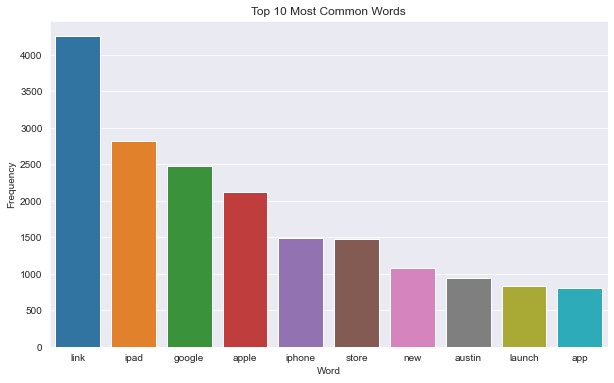

In [33]:

# Plot a bar chart of the top 10 words
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()))
plt.title('Top 10 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

In [34]:
def plot_top_words(brand, emotion):
    
    # Subset the data based on brand and emotion
    df = new_df[(new_df['Brand'] == brand) & (new_df['Emotion'] == emotion)]

    # Concatenate all tweets into a single string
    all_tweets = ' '.join(df['Tweet'])

    # Tokenize the string into words
    words = all_tweets.split()

    # Remove stop words and non-alphabetic characters
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]

    # Calculate word frequencies
    fdist = FreqDist(words)
    top_words = pd.DataFrame(fdist.most_common(10), columns=['Word', 'Frequency'])

    # Plot the top words
    sns.set(style="whitegrid")
    ax = sns.barplot(y="Frequency", x="Word", data=top_words, palette="Blues_d")
    ax.set_title(f"Top 10 words for {emotion} tweets about {brand}")
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Word")

    plt.show()


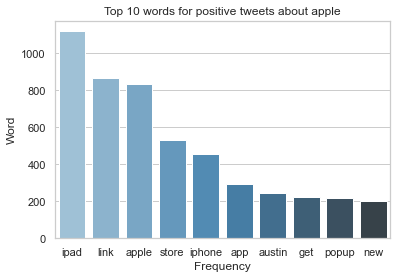

In [35]:
plot_top_words('apple', 'positive')

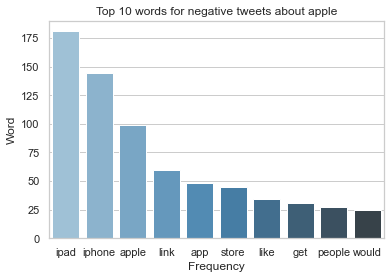

In [36]:
plot_top_words('apple', 'negative')

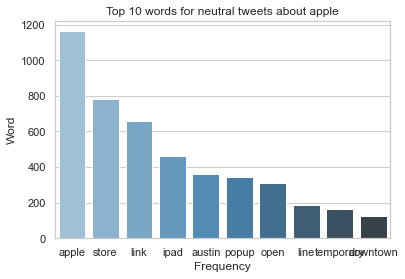

In [37]:
plot_top_words('apple', 'neutral')

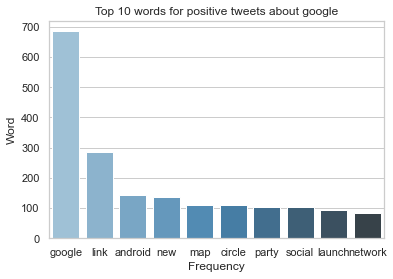

In [38]:
plot_top_words('google', 'positive')

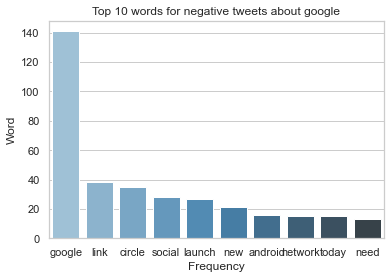

In [39]:
plot_top_words('google', 'negative')

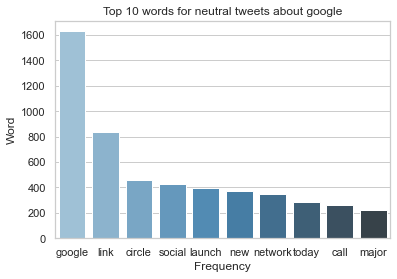

In [40]:

plot_top_words('google', 'neutral')


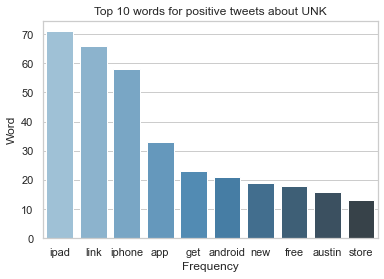

In [41]:
plot_top_words('UNK', 'positive')

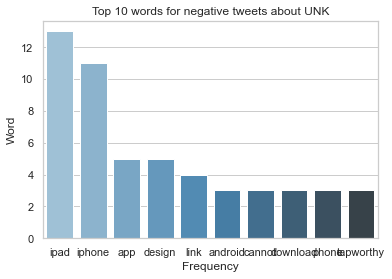

In [42]:
plot_top_words('UNK', 'negative')

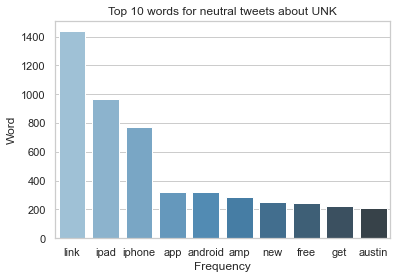

In [43]:
plot_top_words('UNK', 'neutral')

models require the target variable to be of integer type, so let's assign 0 to Negative emotion, 1 to No emotion toward brand or product and 2 to Positive emotion.


In [44]:


def number_map(x):
    if x == 'positive':
        return 2
    elif x == 'neutral':
        return 1
    else:
        return 0

In [45]:
new_df['Emotion'] = new_df['Emotion'].apply(number_map)

In [262]:
new_df['Emotion'].value_counts()

1    5388
2    2978
0     570
Name: Emotion, dtype: int64

In [46]:
# Create dummy variables for the 'Brand' column
brand_dummies = pd.get_dummies(new_df['Brand'], prefix='Brand')

# Concatenate the original DataFrame with the brand_dummies DataFrame
new_df = pd.concat([new_df, brand_dummies], axis=1)

# Drop the 'Brand' column since it is no longer needed
new_df = new_df.drop('Brand', axis=1)

new_df.head()

,Tweet,Emotion,Brand_UNK,Brand_apple,Brand_google
0,iphone hrs tweet rise dead need upgrade plugin...,0,0,1,0
1,know awesome ipadiphone app likely appreciate ...,2,0,1,0
2,wait ipad also sale,2,0,1,0
3,hope years festival crashy years iphone app,0,0,1,0
4,great stuff fri marissa mayer google tim oreil...,2,0,0,1


# Modeling:

We will now begin the modeling process after performing a train-test split. Our initial approach will be to use a Multinomial model, which will be complemented by the application of Term Frequency-Inverse Document Frequency (TF-IDF). TF-IDF is a statistical measure used to evaluate the significance of a word in a document or corpus. It assigns a weight to each term based on its frequency in the document and its rarity in the entire corpus. This weight reflects the importance of the term to the document, with higher weights indicating greater significance.

TF-IDF is commonly used to transform a collection of documents into a numerical feature vector. The feature vector can then be used as input to machine learning algorithms, such as random forest and XGBoost, for tasks like document classification, clustering, and information retrieval.

To address class imbalance, we will apply Random Oversampling after the application of TF-IDF. We will also perform a grid search on both random forest and XGBoost models to determine the best hyperparameters for each.



In [47]:
# split data into features and target variable
X = new_df.drop(['Emotion'], axis=1)
y = new_df['Emotion']

In [48]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer with parameters
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['Tweet'])
# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test['Tweet'])


In [50]:
from imblearn.over_sampling import RandomOverSampler


In [120]:
# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit the training data
X_train_res, y_train_res = ros.fit_resample(X_train_tfidf, np.array(y_train).ravel())


In [121]:
unique, counts = np.unique(y_train_res, return_counts=True)
print(dict(zip(unique, counts)))

{0: 4294, 1: 4294, 2: 4294}


## Baseline Model: 
Multinomial Naive Bayes (MNB) is a type of Naive Bayes algorithm, which is commonly used for text classification tasks. In MNB, the features (words or tokens) are modeled using a multinomial distribution, where each feature represents the frequency of a term in a document. The algorithm calculates the probabilities of each class based on the frequencies of the features in the training data. During prediction, it uses Bayes' theorem to calculate the probability of each class given the input features, and returns the class with the highest probability as the predicted class. MNB is a fast and simple algorithm that works well for text classification tasks with a large number of features.

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
#Initialize the model
nb_model = MultinomialNB()

In [54]:
#Fit the models with the resampled training data
nb_model.fit(X_train_res, y_train_res)

MultinomialNB()

In [55]:
from sklearn.metrics import classification_report, confusion_matrix



In [56]:
# Predict the test data
y_pred = nb_model.predict(X_test_tfidf)

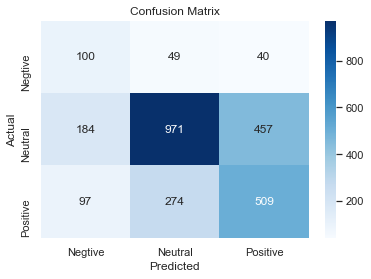

              precision    recall  f1-score   support

    Negative       0.26      0.53      0.35       189
     Neutral       0.75      0.60      0.67      1612
    Positive       0.51      0.58      0.54       880

    accuracy                           0.59      2681
   macro avg       0.51      0.57      0.52      2681
weighted avg       0.64      0.59      0.60      2681



In [57]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()
# Print the classification report
print(classification_report(y_test, y_pred,target_names=['Negative','Neutral','Positive']))

In [58]:
#Importing GrridSearch
from sklearn.model_selection import GridSearchCV

## Random Forest
Random forest is a supervised learning algorithm that builds a large number of decision trees and combines their predictions to obtain a more accurate and stable prediction. Each tree in the random forest is built on a random subset of the data and a random subset of the features. This randomness helps to reduce overfitting and increase the generalization of the model. The output of a random forest is the mode of the predictions of the individual trees, in case of classification problems, or the mean of the predictions, in case of regression problems.

In [59]:
rf_model = RandomForestClassifier()

In [60]:
#Fit the models with the resampled training data
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [61]:
# Predict the test data
rf_pred = rf_model.predict(X_test_tfidf)

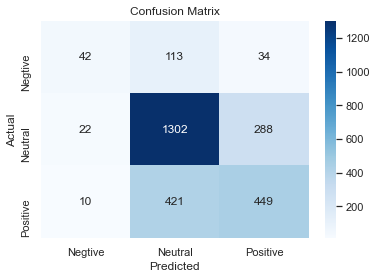

              precision    recall  f1-score   support

    Negative       0.57      0.22      0.32       189
     Neutral       0.71      0.81      0.76      1612
    Positive       0.58      0.51      0.54       880

    accuracy                           0.67      2681
   macro avg       0.62      0.51      0.54      2681
weighted avg       0.66      0.67      0.66      2681



In [62]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, rf_pred,target_names=['Negative','Neutral','Positive']))

In [63]:
#RF gridsearch

In [64]:
rf_param_grid = {'n_estimators': [100, 200],
                 'max_depth': [5, 9, 13],
                 'min_samples_split': [2, 10],
                 'min_samples_leaf': [1, 5],
                 'max_features': ['sqrt']}

In [65]:
# Perform random search with 5 iterations
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1)

In [66]:
# Fit the grid search to the training data
rf_grid.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 9, 13], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 200]})

In [67]:
# Retrain the model using the best hyperparameters
rf_tuned = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
rf_tuned.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=13, max_features='sqrt', n_estimators=200,
                       random_state=42)

In [68]:
# Predict the test data
rf_tuned_y_pred = rf_tuned.predict(X_test_tfidf)

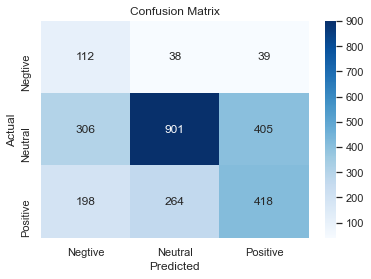

              precision    recall  f1-score   support

    Negative       0.18      0.59      0.28       189
     Neutral       0.75      0.56      0.64      1612
    Positive       0.48      0.47      0.48       880

    accuracy                           0.53      2681
   macro avg       0.47      0.54      0.47      2681
weighted avg       0.62      0.53      0.56      2681



In [69]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_tuned_y_pred)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, rf_tuned_y_pred,target_names=['Negative','Neutral','Positive']))

## XGBoost:
XGBoost (Extreme Gradient Boosting) is a popular gradient boosting library that can be used for classification and regression tasks. Like Random Forest, XGBoost is an ensemble learning method that combines multiple weak models (decision trees in this case) to create a stronger overall model.

The main difference between Random Forest and XGBoost lies in how they combine these weak models. In Random Forest, decision trees are built independently, whereas in XGBoost, they are built sequentially with a focus on reducing the errors made by the previous trees.

To achieve this, XGBoost uses a technique called gradient boosting, where each new tree is trained to correct the mistakes made by the previous trees. The predictions of all the trees are then added together to obtain the final prediction.

XGBoost also has several advanced features, such as regularization and parallel processing, which can improve its performance and scalability. These features make XGBoost a popular choice for many machine learning tasks, particularly those involving structured data.






In [70]:
#Initialize the models
xgb_model = XGBClassifier()

In [71]:
#Fit the models with the resampled training data
xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
# Predict the test data
xgb_pred = xgb_model.predict(X_test_tfidf)

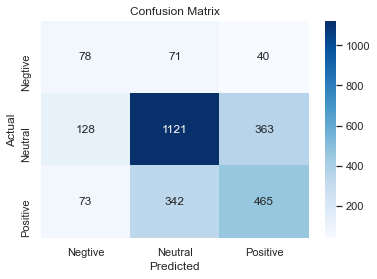

              precision    recall  f1-score   support

    Negative       0.28      0.41      0.33       189
     Neutral       0.73      0.70      0.71      1612
    Positive       0.54      0.53      0.53       880

    accuracy                           0.62      2681
   macro avg       0.52      0.55      0.53      2681
weighted avg       0.63      0.62      0.63      2681



In [73]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_pred)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, xgb_pred,target_names=['Negative','Neutral','Positive']))

## Grid search on XGB

In [74]:
# Define the parameter grid for Grid Search
param_grid =  {'n_estimators': [100, 200, 500],
              'max_depth': [5, 9],
              'learning_rate': [0.01, 0.1],
              'subsample': [0.5, 0.8],
              'colsample_bytree': [0.5, 0.8]}

In [75]:
xgb_grid =GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1)


In [76]:
# Fit the model with the best hyperparameters
xgb_grid.fit(X_train_res, y_train_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                      

In [77]:
# Retrain the model using the best hyperparameters
xgb_tuned = XGBClassifier(**xgb_grid.best_params_, random_state=42)
xgb_tuned.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
# Predict the test data
xgb_tuned_y_pred = xgb_model.predict(X_test_tfidf)

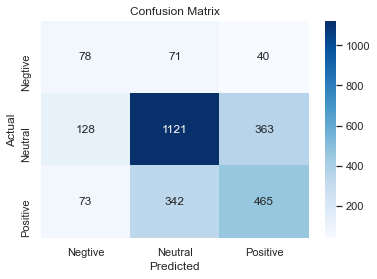

              precision    recall  f1-score   support

    Negative       0.28      0.41      0.33       189
     Neutral       0.73      0.70      0.71      1612
    Positive       0.54      0.53      0.53       880

    accuracy                           0.62      2681
   macro avg       0.52      0.55      0.53      2681
weighted avg       0.63      0.62      0.63      2681



In [79]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_tuned_y_pred)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, xgb_tuned_y_pred,target_names=['Negative','Neutral','Positive']))

## Word Embeddings
We will compare the performance of TF-IDF, XGBoost, and Random Forest models using our custom mean embedding vectorizer class. We will also incorporate pre-trained weights from GloVe, which are considered some of the best pre-trained word vectors and are freely available from the Stanford NLP Group. 

In [80]:
from gensim.models import word2vec

In [81]:
 new_df['Tweet'].head()

0    iphone hrs tweet rise dead need upgrade plugin...
1    know awesome ipadiphone app likely appreciate ...
2                                  wait ipad also sale
3          hope years festival crashy years iphone app
4    great stuff fri marissa mayer google tim oreil...
Name: Tweet, dtype: object

In [82]:
# Seeing how many unique words we have
total_unique_words = set(word for tweet in new_df['Tweet'] for word in tweet.split())
print('There are {} unique words in the dataset.'.format(len(total_unique_words)))


There are 8616 unique words in the dataset.


In [83]:


# Load GloVe word vectors
glove = {}
with open('glove.6B.50d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.split()
        word = parts[0]
        if word in total_unique_words:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector


In [84]:
#checking to see if it worked.
glove['new']

array([ 1.9511e-01,  5.0739e-01,  1.4709e-03,  4.1914e-02, -1.6759e-01,
        3.7517e-02, -1.3970e+00, -9.2398e-01, -2.4296e-01, -1.5171e-01,
       -4.7829e-01,  5.4612e-02, -2.4986e-01,  3.8398e-01,  1.6182e-02,
        3.4938e-01, -2.2627e-01,  8.6618e-02, -4.1001e-01, -1.8139e-01,
        7.5607e-01, -2.6200e-02, -6.9557e-01,  1.0874e-01, -4.7539e-01,
       -1.8095e+00, -1.6940e-01, -5.9863e-02, -1.6806e-01, -9.4546e-02,
        3.6610e+00,  4.1462e-02, -2.9161e-01, -6.9772e-01,  3.0805e-01,
       -2.8457e-01,  1.3217e-01, -7.6430e-03, -9.2390e-02, -4.9237e-01,
       -2.7055e-01,  6.0425e-02,  9.5107e-02, -2.3679e-01, -8.6108e-02,
        1.0243e+00, -2.2779e-01,  3.0488e-02, -1.4272e-01,  4.5411e-01],
      dtype=float32)

In [85]:
#Creating Custom function
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    def transform(self, X):
        # Convert each document to a list of words
        X_words = [doc.split() for doc in X]
        # Compute the document vectors
        X_vec = np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                    or [np.zeros(self.dimensions)], axis=0)
            for words in X_words])
        return X_vec
        
    def fit_transform(self, X, y=None):
        return self.transform(X)


In [86]:

# Instantiate the vectorizer object with the pre-trained GloVe model
w2v_vectorizer = W2vVectorizer(glove)

# Vectorize the training data
X_train_vec = w2v_vectorizer.fit_transform(X_train['Tweet'])

# Vectorize the test data using the same vectorizer as the training data
X_test_vec = w2v_vectorizer.transform(X_test['Tweet'])


In [87]:
#Resampling training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

In [88]:
#nb_model.fit(X_train_resampled, y_train_ressampled)
rf_model.fit(X_train_resampled, y_train_resampled)
xgb_model.fit(X_train_resampled, y_train_resampled)

#gnb_preds = nb_model.predict(X_test_vec)
grf_preds = rf_model.predict(X_test_vec)
gxgb_preds = xgb_model.predict(X_test_vec)


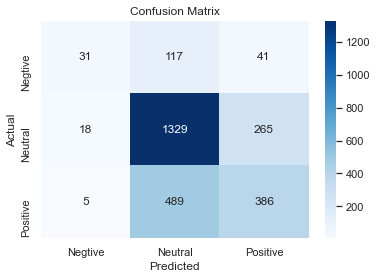

              precision    recall  f1-score   support

    Negative       0.57      0.16      0.26       189
     Neutral       0.69      0.82      0.75      1612
    Positive       0.56      0.44      0.49       880

    accuracy                           0.65      2681
   macro avg       0.61      0.48      0.50      2681
weighted avg       0.64      0.65      0.63      2681



In [89]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, grf_preds)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, grf_preds,target_names=['Negative','Neutral','Positive']))

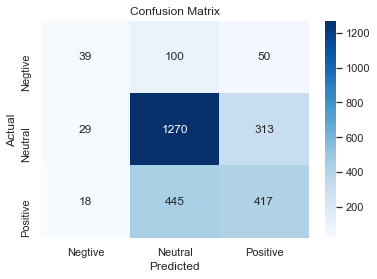

              precision    recall  f1-score   support

    Negative       0.45      0.21      0.28       189
     Neutral       0.70      0.79      0.74      1612
    Positive       0.53      0.47      0.50       880

    accuracy                           0.64      2681
   macro avg       0.56      0.49      0.51      2681
weighted avg       0.63      0.64      0.63      2681



In [90]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, gxgb_preds)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Neutral','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, gxgb_preds,target_names=['Negative','Neutral','Positive']))

# Deep learning withTFIDF and wordd Eembeddings

In [92]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from keras.utils import to_categorical

In [93]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_df['Tweet'])
X = tokenizer.texts_to_sequences(new_df['Tweet'])


In [94]:

from keras.preprocessing.sequence import pad_sequences

maxlen = 100
X = pad_sequences(X, padding='post', maxlen=maxlen)

In [95]:
X_tfidf = tfidf_vectorizer.fit_transform(new_df['Tweet'])

In [96]:
from scipy.sparse import csr_matrix

maxlen = 100

X_tfidf = csr_matrix.toarray(X_tfidf)
X_tfidf = pad_sequences(X_tfidf, padding='post', maxlen=maxlen)




In [124]:
#Train test split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, new_df['Emotion'], test_size=0.2, random_state=42, stratify=new_df['Emotion'])

In [125]:
X_train_tfidf, y_train = ros.fit_resample(X_train_tfidf, y_train)

In [134]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

In [127]:
unique, counts = np.unique(new_df['Emotion'], return_counts=True)
print(dict(zip(unique, counts)))

{0: 570, 1: 5388, 2: 2978}


In [129]:
y_train.value_counts()

2    4310
1    4310
0    4310
Name: Emotion, dtype: int64

In [131]:
unique, counts = np.unique(y_train_encoded, return_counts=True)
print(dict(zip(unique, counts)))

{0: 4310, 1: 4310, 2: 4310}


In [151]:
model = Sequential()
model.add(Embedding(input_dim=X_tfidf.shape[1], output_dim=128, input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.fit(X_train_tfidf, y_train_encoded, validation_data=(X_test_tfidf, y_test_encoded), epochs=10, batch_size=128)

Epoch 1/10
102/102 [==============================] - 20s 195ms/step - loss: 1.0993 - sparse_categorical_accuracy: 0.3384 - val_loss: 1.1243 - val_sparse_categorical_accuracy: 0.0638
Epoch 2/10
102/102 [==============================] - 21s 206ms/step - loss: 1.0990 - sparse_categorical_accuracy: 0.3370 - val_loss: 1.1027 - val_sparse_categorical_accuracy: 0.3333
Epoch 3/10
102/102 [==============================] - 23s 223ms/step - loss: 1.0993 - sparse_categorical_accuracy: 0.3301 - val_loss: 1.0947 - val_sparse_categorical_accuracy: 0.3333
Epoch 4/10
102/102 [==============================] - 21s 208ms/step - loss: 1.0989 - sparse_categorical_accuracy: 0.3254 - val_loss: 1.1019 - val_sparse_categorical_accuracy: 0.0638
Epoch 5/10
102/102 [==============================] - 21s 209ms/step - loss: 1.0988 - sparse_categorical_accuracy: 0.3323 - val_loss: 1.0934 - val_sparse_categorical_accuracy: 0.3333
Epoch 6/10
102/102 [==============================] - 21s 210ms/step - loss: 1.0989 -

In [152]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 128)          12800     
_________________________________________________________________
lstm_13 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 387       
Total params: 144,771
Trainable params: 144,771
Non-trainable params: 0
_________________________________________________________________


In [153]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Convert the predictions from probabilities to class labels
#y_pred = np.argmax(y_pred, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)[:len(y_true)]

y_true = y_test_encoded

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

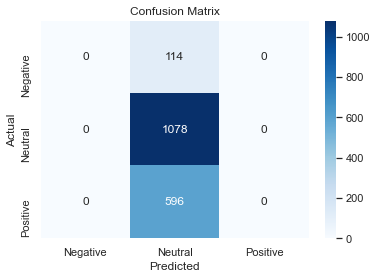

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       114
     Neutral       0.60      1.00      0.75      1078
    Positive       0.00      0.00      0.00       596

    accuracy                           0.60      1788
   macro avg       0.20      0.33      0.25      1788
weighted avg       0.36      0.60      0.45      1788



/Users/a23/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt="d", xticklabels=['Negative','Neutral','Positive'], yticklabels=['Negative','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_true, y_pred_classes, target_names=['Negative','Neutral','Positive']))

In [212]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_df['Tweet'], new_df['Emotion'], test_size=0.2, random_state=42, stratify=new_df['Emotion'])


In [224]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [225]:
# Convert the text data to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [226]:
# Pad sequences to ensure equal length vectors
X_train_padded = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_padded = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

In [227]:
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_padded, y_train)

In [228]:
y_train_encoded = le.fit_transform(y_train_resampled)
y_test_encoded = le.fit_transform(y_test)

In [229]:
# Define vocabulary size and maximum tweet length
vocabulary_size = len(total_unique_words) + 1
maxlen = max([len(tweet.split()) for tweet in new_df['Tweet']])

In [230]:
# Create a weight matrix for words in training data
embedding_matrix = np.zeros((vocabulary_size, 50))
for word, i in tokenizer.word_index.items():
    if i >= vocabulary_size:
        continue
    embedding_vector = glove.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [242]:
# Create an embedding layer
embedding_layer = Embedding(vocabulary_size, 50, weights=[embedding_matrix], input_length=19, trainable=False)

In [243]:
w2_model = Sequential()
w2_model.add(embedding_layer)
w2_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
w2_model.add(Dense(3, activation='softmax'))
w2_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

w2_model.fit(X_train_resampled, y_train_encoded, validation_data=(X_test_padded, y_test_encoded), epochs=10, batch_size=128)

Epoch 1/10
102/102 [==============================] - 5s 48ms/step - loss: 0.9909 - sparse_categorical_accuracy: 0.4997 - val_loss: 0.9652 - val_sparse_categorical_accuracy: 0.5112
Epoch 2/10
102/102 [==============================] - 5s 47ms/step - loss: 0.9232 - sparse_categorical_accuracy: 0.5588 - val_loss: 0.8875 - val_sparse_categorical_accuracy: 0.5263
Epoch 3/10
102/102 [==============================] - 5s 49ms/step - loss: 0.8708 - sparse_categorical_accuracy: 0.5952 - val_loss: 0.9591 - val_sparse_categorical_accuracy: 0.5246
Epoch 4/10
102/102 [==============================] - 5s 48ms/step - loss: 0.8214 - sparse_categorical_accuracy: 0.6189 - val_loss: 0.9031 - val_sparse_categorical_accuracy: 0.5246
Epoch 5/10
102/102 [==============================] - 5s 46ms/step - loss: 0.7565 - sparse_categorical_accuracy: 0.6503 - val_loss: 0.9194 - val_sparse_categorical_accuracy: 0.5570
Epoch 6/10
102/102 [==============================] - 5s 45ms/step - loss: 0.6987 - sparse_cate

In [236]:
print(X_test_padded.shape)

(1788, 19)


In [241]:
print(X_train_resampled.shape)

(12930, 19)


In [244]:
w2_model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 19, 50)            430850    
_________________________________________________________________
lstm_26 (LSTM)               (None, 128)               91648     
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 387       
Total params: 522,885
Trainable params: 92,035
Non-trainable params: 430,850
_________________________________________________________________


In [245]:
# Make predictions on the test set
y_pred = w2_model.predict(X_test_padded)

# Convert the predictions from probabilities to class labels

y_pred_classes = np.argmax(y_pred, axis=1)[:len(y_true)]

y_true = y_test_encoded

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

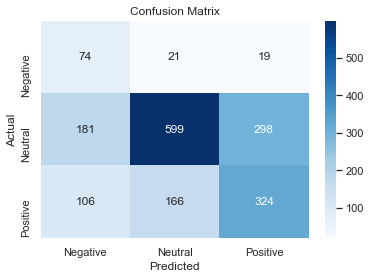

              precision    recall  f1-score   support

    Negative       0.20      0.65      0.31       114
     Neutral       0.76      0.56      0.64      1078
    Positive       0.51      0.54      0.52       596

    accuracy                           0.56      1788
   macro avg       0.49      0.58      0.49      1788
weighted avg       0.64      0.56      0.58      1788



In [246]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt="d", xticklabels=['Negative','Neutral','Positive'], yticklabels=['Negative','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_true, y_pred_classes, target_names=['Negative','Neutral','Positive']))

# Lets now try binary classification:

In [280]:
# Drop rows with neutral emotion
new_binary = new_df[new_df['Emotion'] != 1].copy()



In [281]:
new_binary['Emotion'].value_counts()

2    2978
0     570
Name: Emotion, dtype: int64

In [282]:
def number_map(x):
    if x == 2:
        return 1
    else:
        return 0

In [283]:
new_binary['Emotion'] = new_binary['Emotion'].apply(number_map)


In [284]:
new_binary['Emotion'].value_counts()

1    2978
0     570
Name: Emotion, dtype: int64

In [285]:
# split data into features and target variable
X = new_binary.drop(['Emotion'], axis=1)
y = new_binary['Emotion']

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [287]:
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['Tweet'])
# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test['Tweet'])


In [292]:
# Fit the training data
X_train_res, y_train_res = ros.fit_resample(X_train_tfidf, y_train)


In [295]:
y_train_res.value_counts()

1    2086
0    2086
Name: Emotion, dtype: int64

In [296]:
#Fit the models with the resampled training data
nb_model.fit(X_train_res, y_train_res)

MultinomialNB()

In [297]:
# Predict the test data
y_pred = nb_model.predict(X_test_tfidf)

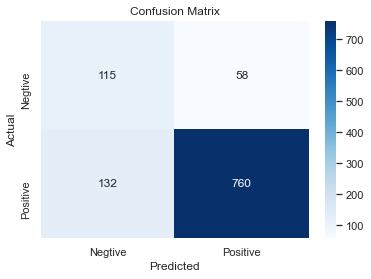

              precision    recall  f1-score   support

    Negative       0.47      0.66      0.55       173
    Positive       0.93      0.85      0.89       892

    accuracy                           0.82      1065
   macro avg       0.70      0.76      0.72      1065
weighted avg       0.85      0.82      0.83      1065



In [300]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d",xticklabels=['Negtive','Positive'], yticklabels=['Negtive','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()
# Print the classification report
print(classification_report(y_test, y_pred,target_names=['Negative','Positive']))

In [ ]:
# RF

In [308]:
rf_model = RandomForestClassifier()

In [309]:
#Fit the models with the resampled training data
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [310]:
# Predict the test data
rf_pred = rf_model.predict(X_test_tfidf)

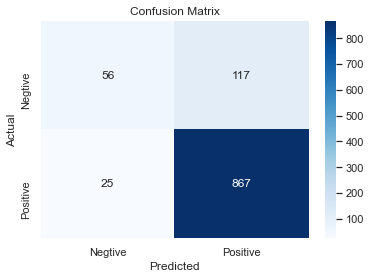

              precision    recall  f1-score   support

    Negative       0.69      0.32      0.44       173
    Positive       0.88      0.97      0.92       892

    accuracy                           0.87      1065
   macro avg       0.79      0.65      0.68      1065
weighted avg       0.85      0.87      0.85      1065



In [311]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Positive'], yticklabels=['Negtive','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, rf_pred,target_names=['Negative','Positive']))

In [ ]:
# XGB

In [304]:
# Initialize the XGBClassifier
xgb_model = XGBClassifier()


In [305]:
#Fit the models with the resampled training data
xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [306]:
# Predict the test data
xgb_pred = xgb_model.predict(X_test_tfidf)

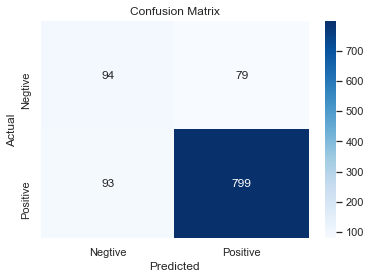

              precision    recall  f1-score   support

    Negative       0.50      0.54      0.52       173
    Positive       0.91      0.90      0.90       892

    accuracy                           0.84      1065
   macro avg       0.71      0.72      0.71      1065
weighted avg       0.84      0.84      0.84      1065



In [307]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_pred)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Positive'], yticklabels=['Negtive','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, xgb_pred,target_names=['Negative','Positive']))

In [312]:
#binary with word embeddding:
# Vectorize the training data
X_train_vec = w2v_vectorizer.fit_transform(X_train['Tweet'])

# Vectorize the test data using the same vectorizer as the training data
X_test_vec = w2v_vectorizer.transform(X_test['Tweet'])


In [313]:
#Resampling training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

In [314]:
#nb_model.fit(X_train_resampled, y_train_ressampled)
rf_model.fit(X_train_resampled, y_train_resampled)
xgb_model.fit(X_train_resampled, y_train_resampled)

#gnb_preds = nb_model.predict(X_test_vec)
grf_preds = rf_model.predict(X_test_vec)
gxgb_preds = xgb_model.predict(X_test_vec)

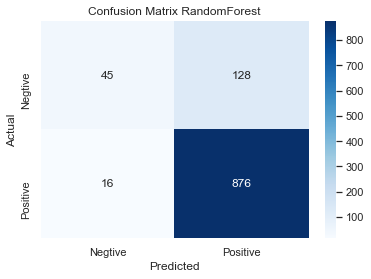

              precision    recall  f1-score   support

    Negative       0.74      0.26      0.38       173
    Positive       0.87      0.98      0.92       892

    accuracy                           0.86      1065
   macro avg       0.81      0.62      0.65      1065
weighted avg       0.85      0.86      0.84      1065



In [317]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, grf_preds)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Positive'], yticklabels=['Negtive','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix RandomForest")
plt.show()

# Print the classification report
print(classification_report(y_test, grf_preds,target_names=['Negative','Positive']))

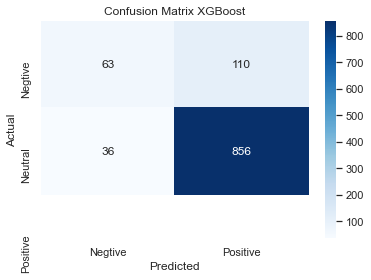

              precision    recall  f1-score   support

    Negative       0.64      0.36      0.46       173
    Positive       0.89      0.96      0.92       892

    accuracy                           0.86      1065
   macro avg       0.76      0.66      0.69      1065
weighted avg       0.85      0.86      0.85      1065



In [318]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, gxgb_preds)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt="d", xticklabels=['Negtive','Positive'], yticklabels=['Negtive','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix XGBoost")
plt.show()

# Print the classification report
print(classification_report(y_test, gxgb_preds,target_names=['Negative','Positive']))

In [ ]:
#Binary deeplearning

In [319]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_binary['Tweet'])
X = tokenizer.texts_to_sequences(new_binary['Tweet'])


In [321]:
X_tfidf = tfidf_vectorizer.fit_transform(new_binary['Tweet'])

In [322]:

maxlen = 100
X = pad_sequences(X, padding='post', maxlen=maxlen)

In [330]:
X_tfidf = csr_matrix.toarray(X_tfidf)
X_tfidf = pad_sequences(X_tfidf, padding='post', maxlen=maxlen)

In [331]:
#Train test split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, new_binary['Emotion'], test_size=0.2, random_state=42, stratify=new_binary['Emotion'])

In [332]:
X_train_tfidf, y_train = ros.fit_resample(X_train_tfidf, y_train)

In [333]:
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

In [334]:
unique, counts = np.unique(y_train_encoded, return_counts=True)
print(dict(zip(unique, counts)))

{0: 2382, 1: 2382}


In [335]:
model = Sequential()
model.add(Embedding(input_dim=X_tfidf.shape[1], output_dim=128, input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_tfidf, y_train_encoded, validation_data=(X_test_tfidf, y_test_encoded), epochs=10, batch_size=128)

Epoch 1/10
38/38 [==============================] - 7s 194ms/step - loss: 0.7521 - accuracy: 0.2645 - val_loss: 0.9873 - val_accuracy: 0.0000e+00
Epoch 2/10
38/38 [==============================] - 7s 176ms/step - loss: 0.7520 - accuracy: 0.2565 - val_loss: 0.9873 - val_accuracy: 0.0000e+00
Epoch 3/10
38/38 [==============================] - 7s 191ms/step - loss: 0.7520 - accuracy: 0.2550 - val_loss: 0.9873 - val_accuracy: 0.1606
Epoch 4/10
38/38 [==============================] - 7s 192ms/step - loss: 0.7520 - accuracy: 0.2706 - val_loss: 0.9873 - val_accuracy: 0.0000e+00
Epoch 5/10
38/38 [==============================] - 8s 201ms/step - loss: 0.7520 - accuracy: 0.2968 - val_loss: 0.9873 - val_accuracy: 0.0000e+00
Epoch 6/10
38/38 [==============================] - 8s 209ms/step - loss: 0.7520 - accuracy: 0.2922 - val_loss: 0.9873 - val_accuracy: 0.1606
Epoch 7/10
38/38 [==============================] - 9s 234ms/step - loss: 0.7520 - accuracy: 0.4053 - val_loss: 0.9873 - val_accurac

In [336]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Convert the predictions from probabilities to class labels
#y_pred = np.argmax(y_pred, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)[:len(y_true)]

y_true = y_test_encoded

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

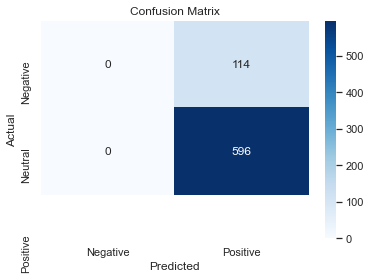

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       114
    Positive       0.84      1.00      0.91       596

    accuracy                           0.84       710
   macro avg       0.42      0.50      0.46       710
weighted avg       0.70      0.84      0.77       710



/Users/a23/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [337]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt="d", xticklabels=['Negative','Positive'], yticklabels=['Negative','Neutral','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_true, y_pred_classes, target_names=['Negative','Positive']))

In [345]:
X = new_binary.drop(['Emotion'], axis=1)
y = new_binary['Emotion']

In [351]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_binary['Tweet'], new_binary['Emotion'],
                             test_size=0.2,random_state=42, stratify=new_binary['Emotion'])


In [352]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [353]:
# Convert the text data to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [354]:
# Pad sequences to ensure equal length vectors
X_train_padded = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_padded = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

In [355]:
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_padded, y_train)

In [356]:
y_train_encoded = le.fit_transform(y_train_resampled)
y_test_encoded = le.fit_transform(y_test)

In [357]:
# Define vocabulary size and maximum tweet length
vocabulary_size = len(total_unique_words) + 1
maxlen = max([len(tweet.split()) for tweet in new_binary['Tweet']])

In [362]:
# Create an embedding layer
embedding_layer = Embedding(vocabulary_size, 50, weights=[embedding_matrix], input_length=100, trainable=False)

In [367]:
w2_model = Sequential()
w2_model.add(embedding_layer)
w2_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
w2_model.add(Dense(2, activation='softmax'))
w2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

w2_model.fit(X_train_resampled, y_train_encoded, validation_data=(X_test_padded, y_test_encoded), epochs=10, batch_size=128)

Epoch 1/10
38/38 [==============================] - 8s 218ms/step - loss: 0.6931 - accuracy: 0.5115 - val_loss: 0.6931 - val_accuracy: 0.8394
Epoch 2/10
38/38 [==============================] - 8s 216ms/step - loss: 0.6931 - accuracy: 0.4981 - val_loss: 0.6931 - val_accuracy: 0.8394
Epoch 3/10
38/38 [==============================] - 10s 254ms/step - loss: 0.6931 - accuracy: 0.4891 - val_loss: 0.6931 - val_accuracy: 0.1606
Epoch 4/10
38/38 [==============================] - 14s 356ms/step - loss: 0.6931 - accuracy: 0.4914 - val_loss: 0.6931 - val_accuracy: 0.1606
Epoch 5/10
38/38 [==============================] - 13s 333ms/step - loss: 0.6931 - accuracy: 0.4962 - val_loss: 0.6931 - val_accuracy: 0.8394
Epoch 6/10
38/38 [==============================] - 9s 246ms/step - loss: 0.6931 - accuracy: 0.4973 - val_loss: 0.6931 - val_accuracy: 0.8394
Epoch 7/10
38/38 [==============================] - 10s 263ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6931 - val_accuracy: 0.1606
Ep

In [368]:
w2_model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 100, 50)           430850    
_________________________________________________________________
lstm_32 (LSTM)               (None, 128)               91648     
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 258       
Total params: 522,756
Trainable params: 91,906
Non-trainable params: 430,850
_________________________________________________________________


In [369]:
# Make predictions on the test set
y_pred = w2_model.predict(X_test_padded)

# Convert the predictions from probabilities to class labels

y_pred_classes = np.argmax(y_pred, axis=1)[:len(y_true)]

y_true = y_test_encoded

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

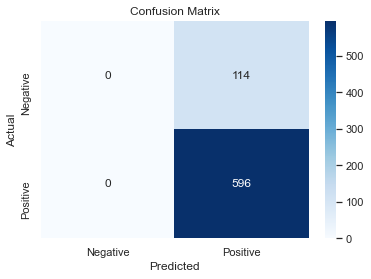

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       114
    Positive       0.84      1.00      0.91       596

    accuracy                           0.84       710
   macro avg       0.42      0.50      0.46       710
weighted avg       0.70      0.84      0.77       710



In [370]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt="d", xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_true, y_pred_classes, target_names=['Negative','Positive']))

In [ ]:
#Feature Importance: